### Урок 7. Многомерный статистический анализ. Линейная регрессия


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

#### Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

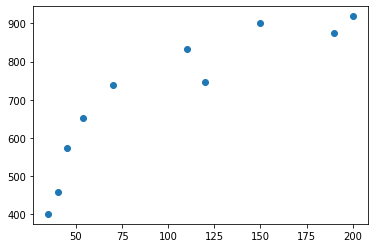

In [3]:
plt.scatter(X,y)
plt.show()

Считаем, что связь между $x$ и $y$ описывается линейной функцией: $y = a + bx$

#### Коэффициенты уравнения линейной регрессии можно найти следующим образом:

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [4]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X) ** 2)
b

2.620538882402765

In [5]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

In [6]:
y_pred = a + b * X

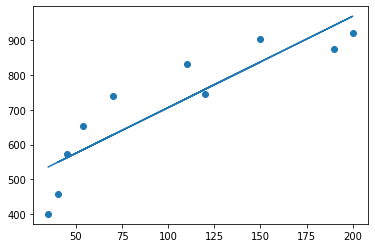

In [7]:
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.show()

Итак, уравнение регрессии имеет вид: $y = 444.18 + 2.62 \cdot x$

С увеличением заплаты заемщика на 1 единицу значение его поведенческого кредитного скоринга возрастет на 2.62

#### Матричный метод поиска коэффициентов 
$$y = \beta_0 + \beta_1*x$$

Представив уравнение в виде матрицы получаем: y = матрица признаков * на матрицу коэффициентов B $$y = X * B$$ 

In [8]:
X = X.reshape(len(X),1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [9]:
y = y.reshape(len(y),1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

Рачет коэффециента, без использования intercept ($\beta_0$)

In [10]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T@y)
B

array([[5.88982042]])

Рачет коэффециента, с использованием intercept ($\beta_0$)

в этом случае в матрице признаков появляется столбец с 1

In [11]:
X = np.hstack([np.ones((len(X),1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [12]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T@y)
print('Получили те же значения коэффициентов, что и способом, успользуя уравнение')
B

Получили те же значения коэффициентов, что и способом, успользуя уравнение


array([[444.17735732],
       [  2.62053888]])

Ответ: 

с использованием intercept a = 444.18; b = 2.62

без использования intercept b = 5.89

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [13]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Без intercept формула слудующая:
$$y = \beta_1 * X$$

In [14]:
def mse_(B1,y=y,X=X,n=len(y)):
  return np.sum((B1*X-y)**2)/n

In [15]:
alfa = 1e-6
alfa

1e-06

In [16]:
# mse = (1/n)*np.sum((B1*X-y)**2)
# mse_p = (2/n)*np.sum((B1*X-y)*X)  # производная

B1 = 0.1 # стартовое значение
n = len(y)
for i in range(1000):
  B1 -= alfa * (2/n)*np.sum((B1*X-y)*X)  # B1 -= alfa * mse_p
  if i%50==0:
    print(f'Iteration: {i}, B1={B1}, mse={mse_(B1)}')

Iteration: 0, B1=0.25952808, mse=493237.7212546963
Iteration: 50, B1=4.497229618367758, mse=83233.94472982832
Iteration: 100, B1=5.54537842245223, mse=58151.31823171113
Iteration: 150, B1=5.804626485478126, mse=56616.849068093856
Iteration: 200, B1=5.868748638669329, mse=56522.97550129376
Iteration: 250, B1=5.884608547059329, mse=56517.232638059555
Iteration: 300, B1=5.888531320728348, mse=56516.88130936019
Iteration: 350, B1=5.889501575592372, mse=56516.85981627392
Iteration: 400, B1=5.8897415574471985, mse=56516.85850140053
Iteration: 450, B1=5.889800914315978, mse=56516.858420961085
Iteration: 500, B1=5.889815595583751, mse=56516.858416040064
Iteration: 550, B1=5.889819226833643, mse=56516.858415739014
Iteration: 600, B1=5.889820124983314, mse=56516.85841572062
Iteration: 650, B1=5.889820347130743, mse=56516.858415719485
Iteration: 700, B1=5.889820402076462, mse=56516.85841571941
Iteration: 750, B1=5.889820415666681, mse=56516.8584157194
Iteration: 800, B1=5.88982041902807, mse=5651

Ответ: B1 = 5.89

#### *3. Произвести вычисления как в пункте 2 (используя градиентный спуск), но с вычислением intercept. 
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

С вычислением intercept формула слудующая:
$$y = \beta_0 + \beta_1 * X$$

In [17]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [18]:
def mse2_(B0,B1,y=y,X=X,n=len(y)):
  return np.sum((B0+B1*X-y)**2)/n

In [20]:
alfa = 1e-5
B0 = 0.1 # стартовое значение
B1 = 0.1 # стартовое значение
n = len(y)

In [21]:
for i in range(4000000):
  B0 -= alfa*(2/n)*np.sum((B0+B1*X-y))
  B1 -= alfa*(2/n)*np.sum((B0+B1*X-y)*X)
  if i%500000==0:
    print(f'Iteration: {i}, B0={B0}, B1={B1}, mse={mse2_(B0,B1)}')

Iteration: 0, B0=0.1139932, B1=1.6950496217904003, mse=298808.66922912706
Iteration: 500000, B0=409.03729808290353, B1=2.8791839426649335, mse=6783.645660253098
Iteration: 1000000, B0=441.3964262548758, B1=2.6410076607593775, mse=6472.375938447427
Iteration: 1500000, B0=443.9572786511766, B1=2.622158750522415, mse=6470.426487340797
Iteration: 2000000, B0=444.15994063146525, B1=2.6206670763125217, mse=6470.414278123679
Iteration: 2500000, B0=444.1759789936681, B1=2.6205490274745853, mse=6470.414201658573
Iteration: 3000000, B0=444.177248245355, B1=2.620539685268393, mse=6470.414201179681
Iteration: 3500000, B0=444.17734869201206, B1=2.620538945940337, mse=6470.41420117668


Ответ: $y = 444.18 + 2.62 \cdot x$